# Komunikacja Człowiek - Komputer
## Zadanie 1
---
Dariusz Max Adamski

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [3]:
def read_algo(name):
    df = pd.read_csv(f'{name}.csv')
    df['average'] = df.drop(['generation', 'effort'], axis=1).mean(axis=1)
    return df

names = ['rsel', 'cel-rs', '2cel-rs', 'cel', '2cel']
frames = twocel_rs, twocel, cel_rs, cel, rsel = [read_algo(x) for x in names]

In [4]:
twocel.head()

,generation,effort,run-52,run-9,run-35,run-0,run-12,run-8,run-20,run-22,...,run-1,run-10,run-7,run-40,run-4,run-39,run-5,run-24,run-23,average
0,0,2500,0.6271,0.6662,0.6267,0.5834,0.7036,0.5881,0.7135,0.6781,...,0.5327,0.6137,0.6373,0.6258,0.6815,0.6795,0.6285,0.6519,0.6611,0.647347
1,1,5000,0.6271,0.6662,0.7325,0.7086,0.7036,0.6676,0.7135,0.6729,...,0.5434,0.6445,0.6498,0.5543,0.6968,0.6795,0.6878,0.6923,0.6914,0.658466
2,2,7500,0.6555,0.6169,0.6289,0.6857,0.6891,0.5666,0.6782,0.7139,...,0.6332,0.6584,0.6191,0.6253,0.6968,0.6885,0.7213,0.6377,0.5928,0.663041
3,3,10000,0.6555,0.6770,0.5734,0.7306,0.6854,0.6113,0.6782,0.6557,...,0.6268,0.6974,0.6333,0.5933,0.6815,0.6026,0.7539,0.6908,0.6187,0.666131
4,4,12500,0.6755,0.6191,0.6777,0.7228,0.6861,0.6356,0.6363,0.7507,...,0.6254,0.6974,0.7186,0.6025,0.6393,0.6812,0.7539,0.6941,0.6187,0.690259


<IPython.core.display.Javascript object>


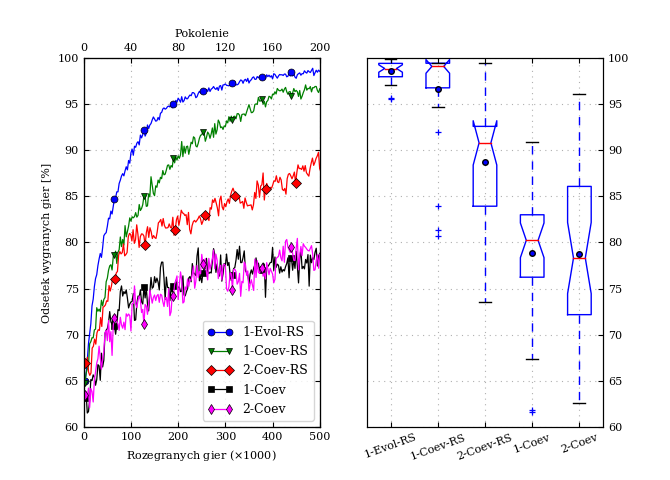

In [5]:
meta = ['generation', 'effort', 'average']
labels = ['1-Evol-RS', '1-Coev-RS', '2-Coev-RS', '1-Coev', '2-Coev']
colors = ['blue', 'green', 'red', 'black', 'magenta']
markers = ['o', 'v', 'D', 's', 'd']

plt.rcParams.update({
    'axes.prop_cycle': matplotlib.cycler(color=colors),
    'font.family': 'serif', 'font.size': 8,
    'mathtext.fontset': 'dejavuserif',
    'xtick.direction': 'in', 'ytick.direction': 'in',
    'grid.linestyle': [1, 4],
})

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(6.7)

# lineplot (left)

ax1 = axes[0]

for i, df in enumerate(frames):
    ax1.plot(df.effort / 1000, df.average * 100,
        linewidth=0.9, label=labels[i], marker=markers[i],
        markevery=25, markersize=5,
        markeredgecolor='black', markeredgewidth=0.5)
    
ax1.grid()
ax1.legend(loc='lower right', numpoints=2, fontsize=9)
ax1.set_xlabel(r'Rozegranych gier ($\times 1000$)')
ax1.set_ylabel('Odsetek wygranych gier [%]')
ax1.set_xlim(0, 500)
ax1.set_ylim(60, 100)

ax1_1 = ax1.twiny()
ax1_1.set_xlabel('Pokolenie')
ax1_1.set_xticklabels(range(0, 200+1, 40))

ax1_2 = ax1.twinx()
ax1_2.set_ylim(60, 100)
ax1_2.set_yticks(range(60, 100+1, 5))
ax1_2.set_yticklabels([])

# boxplot (right)

boxes = [df.drop(meta, axis=1).values[-1] * 100 for df in frames]

ax2 = axes[1]
ax2.boxplot(boxes,
    showmeans=True,
    notch=True,
    boxprops={'color': 'blue'},
    whiskerprops={'color': 'blue', 'linestyle': '-', 'dashes': (6, 5)},
    meanprops={'marker': 'o', 'markersize': 4, 'markerfacecolor': 'blue', 'markeredgecolor': 'black'},
    medianprops={'color': 'red'},
    flierprops={'marker': '+', 'markersize': 4, 'markeredgewidth': 0.9, 'markerfacecolor': 'blue', 'markeredgecolor': 'blue'},
    capprops={'color': 'black'})

ax2.yaxis.tick_right()
ax2.grid()
ax2.set_ylim(60, 100)
ax2.set_xticklabels(labels, rotation=20)
ax2.set_yticklabels(range(60, 100+1, 5))

ax2_1 = ax2.twiny()
ax2_1.set_xlim(-0.5, 4.5)
ax2_1.set_xticks(range(0, 5))
ax2_1.set_xticklabels([])

plt.savefig('zadanie1.png')